In [1]:
import networkx as nx
import random
import numpy as np
import matplotlib.pyplot as plt
from immunization_campaign import ImmunizationCampaign
from sis_model import SISModel

### Questão 1

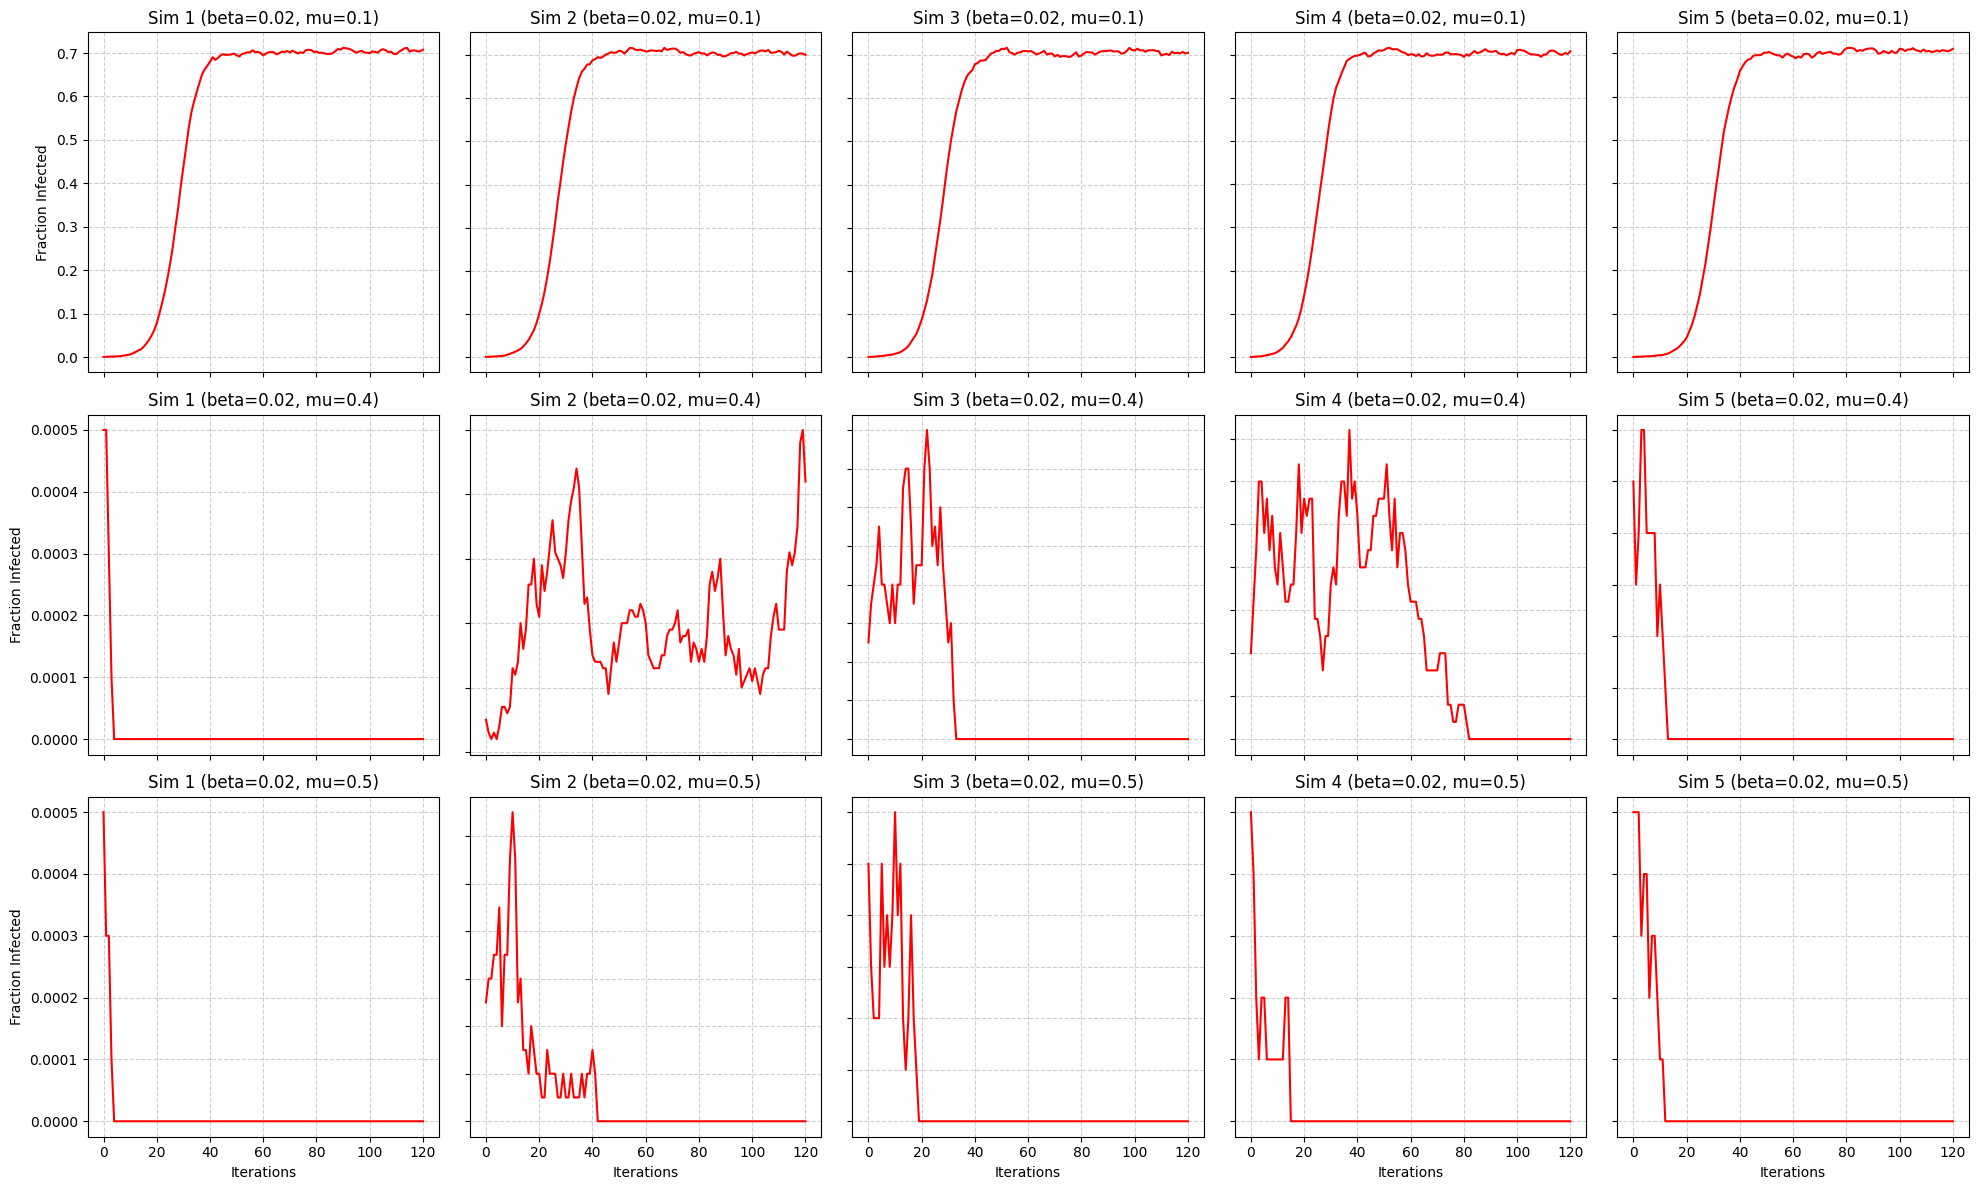

In [ ]:
N = 10_000  
k_medio = 20 
p = k_medio / N   
initial_infected = 5  

beta = 0.02  
mu_values = [0.1, 0.4, 0.5]  
simulations_per_mu = 5 

G = nx.erdos_renyi_graph(N, p)


fig, axs = plt.subplots(len(mu_values), simulations_per_mu, figsize=(20, 12))

for row, mu in enumerate(mu_values):
    for col in range(simulations_per_mu):
        sis = SISModel(G, beta=beta, mu=mu, initial_infected=initial_infected)

        sis.run(steps=120)

        fraction_infected = [x / N for x in sis.history]

        axs[row, col].plot(fraction_infected, color="red", linewidth=1.5)
        axs[row, col].set_title(f"Sim {col + 1} (beta={beta}, mu={mu})")

        axs[row, col].grid(True, linestyle='--', alpha=0.6)

for ax in axs.flat:
    ax.set(xlabel="Iterations", ylabel="Fraction Infected")
    ax.label_outer()

plt.tight_layout()
plt.show()


Da teoria sabemos que a população limite é dada por:
$$ L = 1 - \frac{\mu}{\beta \langle k \rangle}.$$
Portanto, para cada caso temos:

ITEM A: $$L = 1 - \frac{0.1}{0.02 \cdot 20} = 1 - \frac{0.1}{0.4} = 1 - 0.25 = 0.75 $$
ITEM B: $$ L = 1 - \frac{0.4}{0.02 \cdot 20} = 1 - \frac{0.4}{0.4} = 1 - 1 = 0 $$
ITEM C: $$ L = 1 - \frac{0.5}{0.02 \cdot 20} = 1 - \frac{0.5}{0.4} = 1 - 1.25 = -0.25 $$

Nos casos b) e c), a doença foi completamente erradicada, já que o número de infectados chegou a zero. Esses resultados estão alinhados com as previsões teóricas e também com os dados observados na simulação. No caso a), foi identificada uma estabilização por volta da iteração 50, com cerca de 75% da população infectada, enquanto nos casos b) e c), a doença desapareceu. É interessante notar que, na situação b), a extinção da doença levou, em média, um pouco mais de tempo do que na situação c). Em algumas simulações do caso b), mesmo após 100 dias, a doença ainda não havia sido eliminada, como mostrado no gráfico.

Outro ponto digno de nota é que o intervalo de confiança calculado para o caso a) geralmente não inclui o valor teórico de 75% de infectados, tendendo a valores ligeiramente menores. Embora a causa exata disso não seja clara, acredita-se que possa estar relacionada a arredondamentos ou a desvios nos geradores de números aleatórios utilizados. Outra possibilidade é que o tempo de simulação não tenha sido longo o suficiente para que o sistema atingisse o valor teórico de equilíbrio.

### Questão 2

Aqui vale lembrar que, como dito no Capítulo 5 do livro do Barabasi, o modelo BA gera redes com distribuição seguindo a lei de potências com expoente 3. Usaremos esse algoritmo para gerar a rede livre de escala.

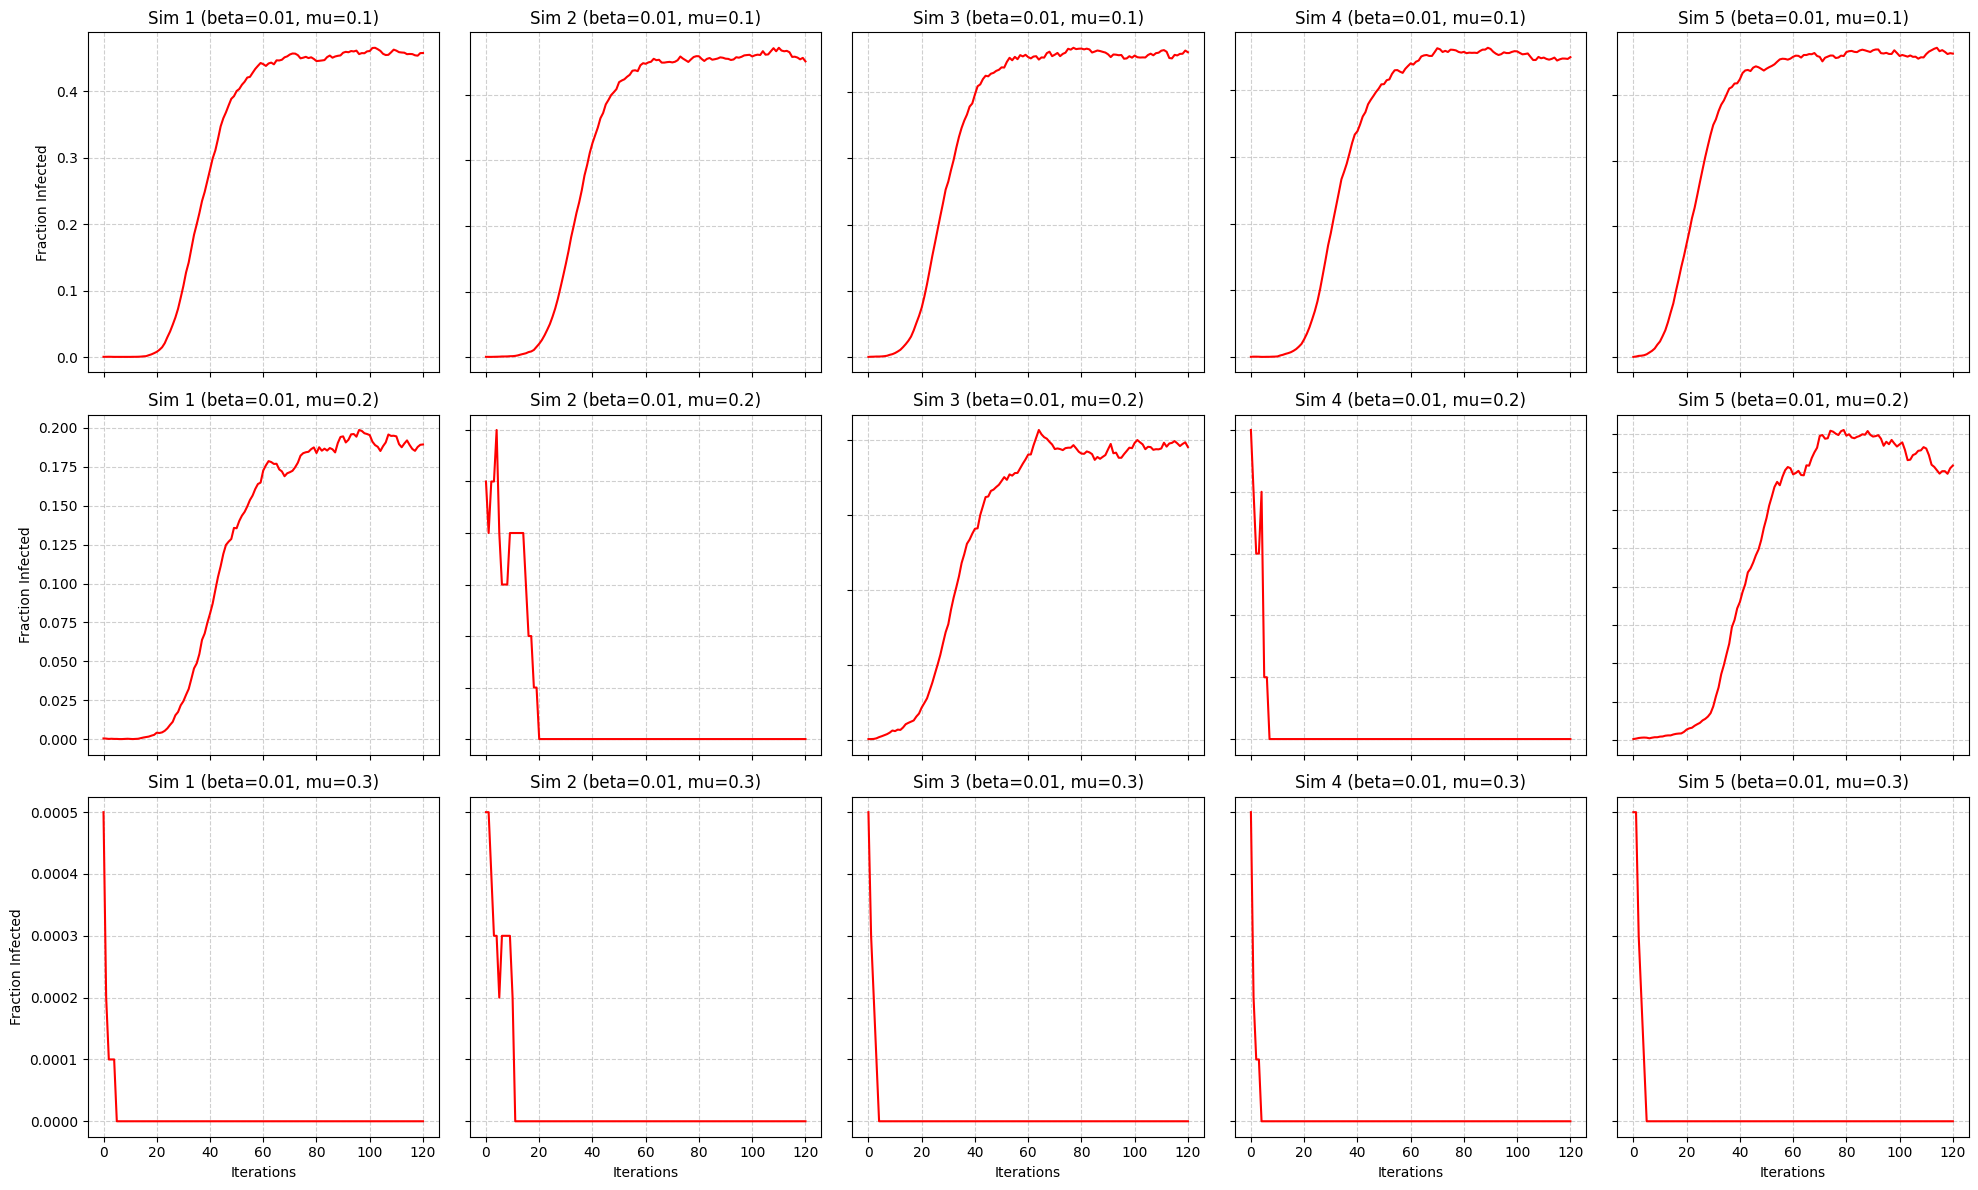

In [5]:
N = 10_000  
k_medio = 20  
initial_infected = 5  
beta = 0.01 
mu_values = [0.1, 0.2, 0.3] 

m = k_medio // 2 
G = nx.barabasi_albert_graph(N, m)

fig, axs = plt.subplots(len(mu_values), simulations_per_mu, figsize=(20, 12))

for row, mu in enumerate(mu_values):
    for col in range(simulations_per_mu):
        sis = SISModel(G, beta=beta, mu=mu, initial_infected=initial_infected)

        sis.run(steps=120)

        fraction_infected = [x / N for x in sis.history]

        axs[row, col].plot(fraction_infected, color="red", linewidth=1.5)
        axs[row, col].set_title(f"Sim {col + 1} (beta={beta}, mu={mu})")

        axs[row, col].grid(True, linestyle='--', alpha=0.6)

for ax in axs.flat:
    ax.set(xlabel="Iterations", ylabel="Fraction Infected")
    ax.label_outer()

plt.tight_layout()
plt.show()

De acordo com a Caixa 4.5 do Capítulo 4 do livro do Barabási, o segundo momento ,$\langle k^2\rangle$, de uma rede livre de escala com expoente menor ou igual a 3 tende a divergir. Sabemos que a condição para que uma doença se torne endêmica é: 
$$ \dfrac{\beta}{\mu} > \dfrac{\langle k\rangle}{\langle k^2\rangle} $$ 

Quando o valor de $\langle k^2\rangle$ diverge, isso implica que a doença tende a se manter endêmica, pois a existência de hubs altamente conectados na rede fornece um suporte suficiente para que a infecção persista ao longo do tempo. O que se observa nas simulações é que, exceto pelos casos em que flutuações aleatórias levam à extinção da doença logo no início, a infecção permanece ativa e atinge um estado estável.

Essa extinção inicial depende fortemente da relação entre $\beta$ e $\mu$. É possível notar nas simulações que ela ocorre com maior frequência no caso 𝑐 menos frequentemente no caso 𝑏, e não é observada no caso 𝑎. Isso está em linha com a expectativa, já que a probabilidade de sobrevivência inicial da doença é maior quanto maior for a razão entre $\beta$ e $\mu$
Além disso, Barabási sugere na Imagem 10.12 que, quando o expoente 
$\gamma = 3$, a fração de infectados no estado endêmico pode ser aproximada pela expressão: 
$$2e^{-\frac{\mu}{\beta k_{\text{min}}}}$$
 
Ou seja, para redes com $\gamma = 3$, a porcentagem de infectados na fase endêmica depende exponencialmente da relação $\frac{\mu}{\beta}$ e do grau mínimo $k_{\text{min}}$ na rede




### Questão 3

Analisando o método: random
Estado endêmico evitado com 30 nós imunizados (random).
Analisando o método: hubs
Estado endêmico evitado com 10 nós imunizados (hubs).
Analisando o método: neighbors
Estado endêmico evitado com 10 nós imunizados (neighbors).


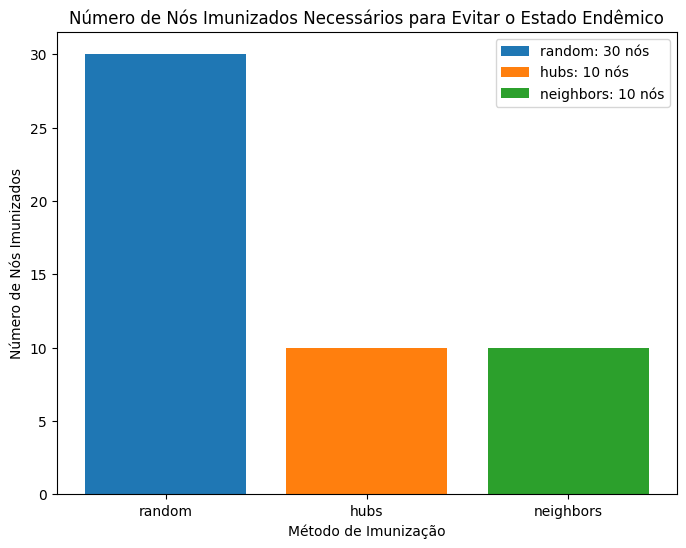

In [ ]:
def is_disease_eradicated(history):
    return all(infected == 0 for infected in history[-10:])  

def compute_moments(G):
    degrees = np.array([deg for _, deg in G.degree])
    return np.mean(degrees), np.mean(degrees**2)


N = 10_000  
k_medio = 20  
initial_infected = 5  
beta = 0.01 
mu_values = [0.1, 0.2, 0.3] 
m = k_medio // 2 

max_immunized = 300 
steps = 100

G = nx.barabasi_albert_graph(N, m)

methods = ["random", "hubs", "neighbors"]
results = {}

for method in methods:
    print(f"Analisando o método: {method}")
    for num_immunized in range(10, max_immunized + 10, 10):  
        campaign = ImmunizationCampaign(graph=G.copy(), method=method, seed=42)
        campaign.immunize(num_nodes=num_immunized)

        sis = SISModel(
            graph=campaign.graph,
            beta=beta,
            mu=mu,
            initial_infected=initial_infected,
            immunization_campaign=campaign,
            seed=42,
        )
        sis.run(steps=steps)

        if is_disease_eradicated(sis.history):
            print(f"Estado endêmico evitado com {num_immunized} nós imunizados ({method}).")
            results[method] = num_immunized
            break

plt.figure(figsize=(8, 6))
for method, num_immunized in results.items():
    plt.bar(method, num_immunized, label=f"{method}: {num_immunized} nós")
plt.xlabel("Método de Imunização")
plt.ylabel("Número de Nós Imunizados")
plt.title("Número de Nós Imunizados Necessários para Evitar o Estado Endêmico")
plt.legend()
plt.show()

C:\Users\Isas_\AppData\Local\Temp\ipykernel_23528\4077044682.py:55: RuntimeWarning: invalid value encountered in scalar divide
  results_hubs.append(first_moment_hubs / second_moment_hubs)


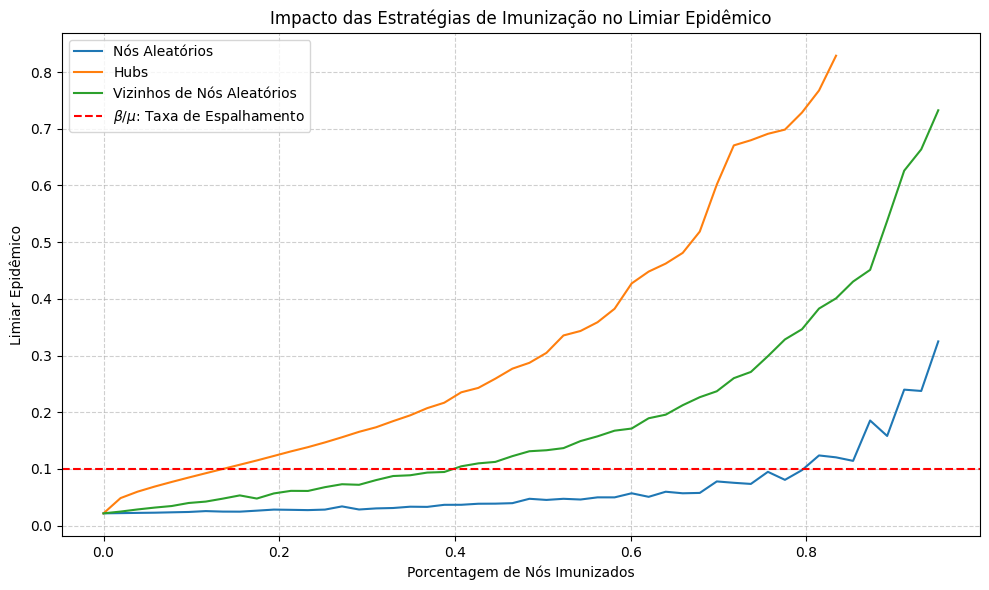

In [12]:
N = 10_000  
k_medio = 20  
beta = 0.01  
mu = 0.1  


G = nx.barabasi_albert_graph(N, int(k_medio / 2), seed=21)

def compute_moments(G):
    degrees = np.array([deg for _, deg in G.degree])
    return np.mean(degrees), np.mean(degrees**2)

def immunize_randomly(G, fraction):
    immunized = np.random.choice(G.nodes(), size=int(fraction * len(G)), replace=False)
    G.remove_nodes_from(immunized)

def immunize_hubs(G, fraction):
    hubs = sorted(G.degree(), key=lambda x: x[1], reverse=True)[:int(fraction * len(G))]
    G.remove_nodes_from([node for node, _ in hubs])

def immunize_neighbors_of_random(G, fraction):
    num_to_immunize = int(fraction * len(G))
    selected = np.random.choice(G.nodes(), size=num_to_immunize, replace=False)
    neighbors = set()
    
    for node in selected:
        neighbors.update(set(G.neighbors(node)))
        if len(neighbors) >= num_to_immunize:
            break
    
    if len(neighbors) > num_to_immunize:
        neighbors = set(np.random.choice(list(neighbors), size=num_to_immunize, replace=False))
    
    G.remove_nodes_from(neighbors)

fractions = np.linspace(0, 0.95, 50)
results_random = []
results_hubs = []
results_neighbors = []

for fraction in fractions:
    G_random = G.copy()
    G_hubs = G.copy()
    G_neighbors = G.copy()
    
    immunize_randomly(G_random, fraction)
    immunize_hubs(G_hubs, fraction)
    immunize_neighbors_of_random(G_neighbors, fraction)
    
    first_moment_random, second_moment_random = compute_moments(G_random)
    first_moment_hubs, second_moment_hubs = compute_moments(G_hubs)
    first_moment_neighbors, second_moment_neighbors = compute_moments(G_neighbors)
    
    results_random.append(first_moment_random / second_moment_random)
    results_hubs.append(first_moment_hubs / second_moment_hubs)
    results_neighbors.append(first_moment_neighbors / second_moment_neighbors)

plt.figure(figsize=(10, 6))
plt.plot(fractions, results_random, label="Nós Aleatórios")
plt.plot(fractions, results_hubs, label="Hubs")
plt.plot(fractions, results_neighbors, label="Vizinhos de Nós Aleatórios")
plt.axhline(y=beta / mu, color='r', linestyle='--', label=r"$\beta / \mu$: Taxa de Espalhamento")
plt.xlabel("Porcentagem de Nós Imunizados")
plt.ylabel("Limiar Epidêmico")
plt.title("Impacto das Estratégias de Imunização no Limiar Epidêmico")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


De acordo com a fórmula (10.29) do Capítulo 10, para alcançar a condição desejada $\dfrac{\beta}{\mu} < \dfrac{<k>}{<k^2>}$ por meio da imunização aleatória, é necessário imunizar uma fração $g_c$ dos nós, onde  $g_c$ é dado por:
$$
g_c = 1 - \dfrac{\mu}{\beta}\dfrac{<k>}{<k^2>}
$$

Ao variar a seed utilizada para gerar o grafo, observa-se que o valor empírico de $g_c$ é próximo ao estimado teoricamente, ficando em torno de 0.8, como identificado nas simulações.

A estratégia de imunização que utiliza os vizinhos dos nós escolhidos aleatoriamente revelou-se mais eficiente do que a imunização aleatória, o que é consistente com as expectativas. Ao imunizar os vizinhos de nós aleatórios, há uma maior probabilidade de vacinar os hubs devido ao efeito conhecido como "meus amigos têm mais amigos do que eu", que ocorre em redes complexas.

Por outro lado, a estratégia de imunizar os hubs mostrou ser a mais eficaz de todas. Isso ocorre porque os hubs são os nós com maior grau, ou seja, aqueles mais propensos a serem infectados e a transmitir a infecção para outros. Ao imunizar esses nós altamente conectados, reduzimos drasticamente as chances de propagação da doença, além de fragmentar a rede, limitando o alcance da infecção.

### Extra
rode o arquivo SIS_MODEL que possui uma animação da simulação do modelo SIS.